# Lab Deep Learning: Multi-Layer Perceptron for regression in pytorch

## Objective:

The objective of this lab is to demonstrate the use of Neural Networks to perform non-linear regression.
We will use a simple NN with 1 hidden layer. The hidden layer has $n_h$ (you will test various values of $n_h$) hidden units and either a ```sigmoid```, ```relu``` or ```tanh``` activation.
Since we perform a regression task the output $\hat{y} \in \mathbb{R}$ and  there is no output activation (linear).

You will perform 1000 iterations (epochs) of SGD to find the parameters.

You will then apply the network to the two datasets A and B.

Note: for this lab, we do not separate the dataset into a train, validation and test part. We simply check the ```capacity``` of the network to model the training data.

## Load the python packages

In [200]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

Checking if we have a GPU or not, if not, we use the CPU.

In [201]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Datasets

We will use two different datasets. For both $x$ has dimensions $(m,n_{in}=1)$ and $y$ has dimensions $(m,n_{out}=1)$ where $m$ is the number of examples.



In [202]:
def F_do_dataset_parab(m):
    x_data = torch.linspace(-1, 1, m)
    noise_data = 0.2*torch.rand(m)
    y_data = x_data.pow(2) + noise_data

    # --- change vectos to matrix
    x_data = torch.unsqueeze(x_data, dim=1)
    y_data = torch.unsqueeze(y_data, dim=1)
    return x_data, y_data

def F_do_dataset_sin(m):
    x_data = torch.arange(0, m, dtype=torch.float32)
    noise_data = 0.2*torch.rand(m)
    y_data = torch.sin(2*np.pi*x_data*0.001) + noise_data

    # --- change vectos to matrix
    x_data = torch.unsqueeze(x_data, dim=1)
    y_data = torch.unsqueeze(y_data, dim=1)
    return x_data, y_data

size of x_data: torch.Size([3000, 1])
size of y_data: torch.Size([3000, 1])


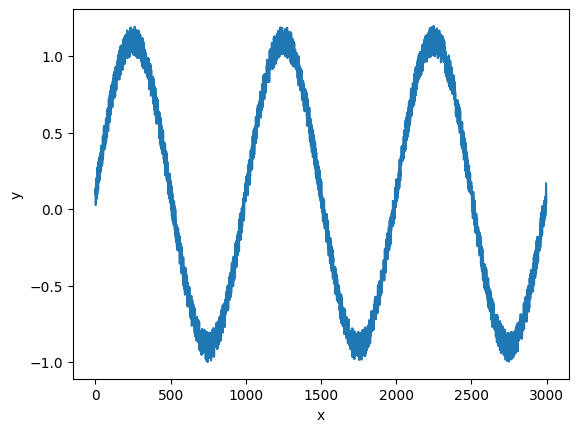

In [203]:
# --- Dataset 1
#x_data, y_data = F_do_dataset_parab(m=100)
# --- Dataset 2
x_data, y_data = F_do_dataset_sin(m=3000)

x_data = x_data.to(device)
y_data = y_data.to(device)

plt.plot(x_data.cpu().numpy(), y_data.cpu().numpy());
plt.xlabel('x'), plt.ylabel('y');

print('size of x_data:', x_data.size())
print('size of y_data:', y_data.size())

## Data standardization

We standardize the input data (substract mean and divide by standard-deviation)

In [204]:
# --- START CODE HERE (01)
mean_data_x = torch.mean(x_data)
deviaton_data_x = torch.std(x_data)

mean_data_y = torch.mean(y_data)
deviation_data_y = torch.std(y_data)

x_data = (x_data - mean_data_x) / deviaton_data_x
y_data = (y_data - mean_data_y) / deviation_data_y
# --- END CODE HERE

## Hyper-parameters definition

In [205]:
# in out params
n_in = 1
n_h = 10
n_out = 1

# Params of model
nb_epoch = 20000
learning_rate_alpha = 0.05
param_momentum = 0.01
param_L1_weight = 0.001
param_L2_weight = 0.001

## Model A (writting the network equations)

### Initialize the variables

According to https://pytorch.org/docs/stable/generated/torch.nn.Linear.html for details), we initialize the matrixes from ${U}(-\sqrt k, -\sqrt k)$ with $k = \frac{1}{\text{in\_features}}$.

In [206]:
# --- START CODE HERE (02)
k = np.sqrt(1 / n_in)

W1 = (2 * k * torch.rand((1, n_h), device=device) - k).requires_grad_()
b1 = (2 * k * torch.rand((n_h,), device=device) - k).requires_grad_()

W2 = (2 * k * torch.rand((n_h, n_out), device=device) - k).requires_grad_()
b2 = (2 * k * torch.rand((n_out,), device=device) - k).requires_grad_()

# --- END CODE HERE

### Define the model

We will denote by ```H``` the pre-activation (value before the non-linearity) and by ```A``` the activation (value after the non-linearity).

In [207]:
def model(X):

    # --- H is the results of the first projection
    # --- H is then transformed by a non-linearity to A
    # --- START CODE HERE (03)

    H = torch.matmul(X, W1) + b1
    

    A = torch.tanh(H)

    H2 = torch.matmul(A, W2) + b2
    
    # --- END CODE HERE
    return H2

### Train the model

**Note**: when updating the parameters (W1,b1,W2,b2) you should use an "in-place" update: ```W1 -= ...``` instead of ```W1 = W1 - ...```; otherwise ```W1``` will be replaced by its value and its gradient field will not exist anymore.

In [208]:
for epoch in range(0, nb_epoch):
    # --- X (m, n_in)
    # --- Y (m, n_out)
    # --- START CODE HERE (04)

    y_predicted = model(x_data)
    loss = torch.mean( (y_data - y_predicted) ** 2) 
    
    # --- END CODE HERE

    if epoch % 1000 == 0:
        print(f'epoch {epoch}, loss {loss}')

    loss.backward()

    with torch.no_grad():
        # --- START CODE HERE (05)
        
        W1 -= learning_rate_alpha*W1.grad
        W2 -= learning_rate_alpha*W2.grad
        b1 -= learning_rate_alpha*b1.grad
        b2 -= learning_rate_alpha*b2.grad

        # --- END CODE HERE
        
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()


epoch 0, loss 9.14940357208252
epoch 1000, loss 0.833750307559967
epoch 2000, loss 0.8056654334068298
epoch 3000, loss 0.7476329803466797
epoch 4000, loss 0.5424219369888306
epoch 5000, loss 0.07512611150741577
epoch 6000, loss 0.057156432420015335
epoch 7000, loss 0.04801804572343826
epoch 8000, loss 0.039826150983572006
epoch 9000, loss 0.032501671463251114
epoch 10000, loss 0.02702385187149048
epoch 11000, loss 0.022542836144566536
epoch 12000, loss 0.01901267096400261
epoch 13000, loss 0.016377650201320648
epoch 14000, loss 0.014483626931905746
epoch 15000, loss 0.013139104470610619
epoch 16000, loss 0.012173154391348362
epoch 17000, loss 0.01145800482481718
epoch 18000, loss 0.01090790331363678
epoch 19000, loss 0.010468557476997375


### Plotting the results

We will super-impose the biases of the first layer to better understand how the model has fit the sinusoidal curve.

As we can see, the biases that are not null help stretch the estimated sinusoid so it fits the original, the ones near zero are there to interpolate correctly the estimated function.

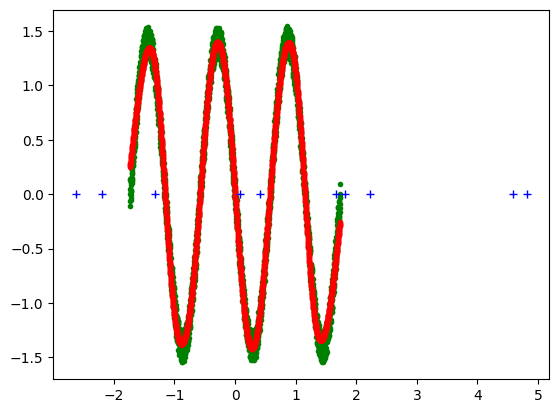

In [209]:
# ----------------
y_pred = model(x_data)
plt.plot(x_data.cpu().numpy(), y_data.cpu().numpy(), 'g.');
plt.plot(x_data.cpu().numpy(), y_pred.cpu().detach().numpy(), 'r.');
# super-impose the biases of the first layer
plt.plot(b1.cpu().detach().numpy(), np.zeros((n_h,1)), 'b+');

## Model B (using Sequential class)

Here, you will write the network using the nn.Sequential class.
With this you can use the ready-made layers ``torch.nn.Linear``,``torch.nn.Tanh``, ...

In [210]:
# --- START CODE HERE (06)
model_sequential = torch.nn.Sequential(
    torch.nn.Linear(in_features=n_in, out_features=n_h, bias=True, device=device),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=n_h, out_features=n_out, bias=True, device=device),
)

MSELoss = torch.nn.MSELoss()
optimizer = optim.SGD(model_sequential.parameters(), lr = learning_rate_alpha, momentum=param_momentum)
# --- END CODE HERE

In [211]:
# Training the model using Sequential and SGD
loss_sequential = []
for epoch in range(nb_epoch):

    # --- START CODE HERE (10)
    
    optimizer.zero_grad()
    y_pred = model_sequential(x_data)
    
    loss = MSELoss(y_pred, target=y_data)
    loss.backward()

    optimizer.step()
    # --- END CODE HERE

    loss_sequential.append(loss)
    if epoch % 1000 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.data))

epoch 0, loss 1.010902762413025
epoch 1000, loss 0.8410566449165344
epoch 2000, loss 0.47319865226745605
epoch 3000, loss 0.12711581587791443
epoch 4000, loss 0.11007747054100037
epoch 5000, loss 0.1000756025314331
epoch 6000, loss 0.0915980190038681
epoch 7000, loss 0.08399780839681625
epoch 8000, loss 0.07691752165555954
epoch 9000, loss 0.07003112137317657
epoch 10000, loss 0.06353465467691422
epoch 11000, loss 0.057464007288217545
epoch 12000, loss 0.051738519221544266
epoch 13000, loss 0.04637863487005234
epoch 14000, loss 0.04148158058524132
epoch 15000, loss 0.03709341213107109
epoch 16000, loss 0.03308359533548355
epoch 17000, loss 0.029228385537862778
epoch 18000, loss 0.02542022615671158
epoch 19000, loss 0.02179579623043537


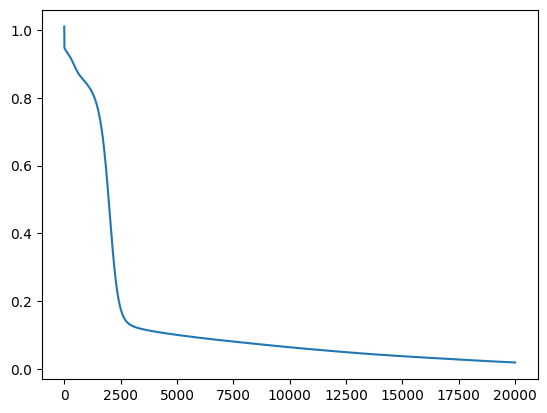

In [212]:
# ----------------
# Plotting the Loss over time
plt.plot([loss.cpu().detach().numpy() for loss in loss_sequential])

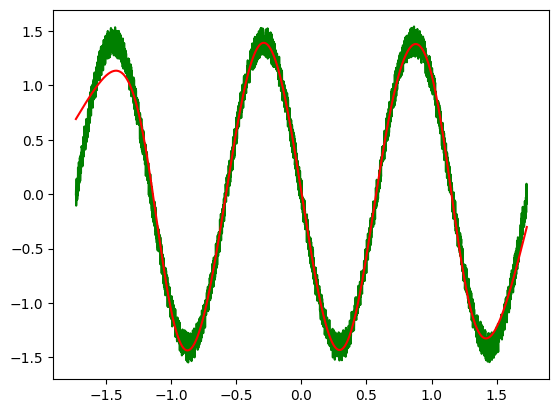

In [213]:
# ----------------
plt.plot(x_data.cpu().numpy(), y_data.cpu().numpy(), 'g')
plt.plot(x_data.cpu().numpy(), y_pred.cpu().detach().numpy(), 'r')

## Model C (using a class definition)

Here, you will write the network using the recommended pytorch way; i.e. by defining a class.
This class inherit from the main class ```torch.nn.Module```.
You only need to write the ```__init__``` method and the ```forward``` method.

In object programming, the ```__init__``` method defines the attributes of your class. Since the attributes of your  network are the parameters to be trained (weights and biases), you should declare in the ```__init``` all the layers that involve parameters to be trained (mostly the ```Linear```layers which perform the matrix multiplication).

The ```forward``` method contains the code of the forward pass itself. It can of course call attributes defined in the ```__init___``` method. It is the method used when calling ```model(x)```.

As before, the model created will have all its parameters accessible as a dictionary and can be accessed using ```model.parameters()```.

Classes are convenient way to write more complex network than what you can do with ```nn.sequential```. Note that you can actually include a ```nn.sequential``` in your class.

In [214]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # --- START CODE HERE (07)
        self.input = nn.Linear(in_features=n_in, out_features=n_h, bias=True, device=device)
        self.activation = nn.Tanh()
        self.output = nn.Linear(in_features=n_h, out_features=n_out,bias=True, device=device)
        # --- END CODE HERE

    def forward(self, x):

        # --- START CODE HERE (08)
        y_1 = self.input(x)
        y_2 = self.activation(y_1)
        y_pred = self.output(y_2)
        # --- END CODE HERE

        return y_pred

# --- START CODE HERE (08)
neural_network = Net()
# --- END CODE HERE

## Model B+C

### Criterion and Optimization

The code of Model A is self-contained, i.e. it already contains all necessary instruction to perform forward, loss, backward and parameter updates.

When using ```nn.sequential``` (model B) or a class definition of the network (model C), we still need to define
- what we will minimize (the loss to be minimized, i.e. Mean-Square-Error or Binary-Cross-Entropy). We can of course write the equation of it by hand but pytorch comes with a very large number of pre-build loss functions (within ```torch.nn```)
- how we will minimize the loss, i.e. what parameter update alogirhtms we will use (SGD, momentum). We can of course write the equation of it by hand but pytorch comes with a very large number of pre-build loss functions (within ```torch.nn```)

L2 regularization can be done directly in the optimizer under the name ```weight_decay```.

In [215]:
# --- START CODE HERE (09)
MSELoss = torch.nn.MSELoss()
optimizer = optim.SGD(neural_network.parameters(), lr = learning_rate_alpha, weight_decay=param_L2_weight, momentum=param_momentum)
# --- END CODE HERE

### Training

Having defined the network, the citerion to be minimized and the optimizer, we then perform a loop over epochs (iterations); at each step we
- compute the forward pass by passing the data to the model: ```haty = model(x)```
- compute the the loss (the criterion)
- putting at zero the gradients of all the parameters of the network (this is important since, by default, pytorch accumulate the gradients over time)
- computing the backpropagation (using as before ```.backward()```)
- performing one step of optimization (using ```.step()```)

In [216]:
loss_l = []
for epoch in range(nb_epoch):

    # --- START CODE HERE (10)
    
    optimizer.zero_grad()
    y_pred = neural_network(x_data)
    loss = MSELoss(y_pred, target=y_data)
    
    loss.backward()
    optimizer.step()
    
    # --- END CODE HERE

    loss_l.append(loss)
    if epoch % 1000 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.data))

epoch 0, loss 1.2798844575881958
epoch 1000, loss 0.8452202677726746
epoch 2000, loss 0.5004353523254395
epoch 3000, loss 0.14492963254451752
epoch 4000, loss 0.12525393068790436
epoch 5000, loss 0.11455800384283066
epoch 6000, loss 0.10604512691497803
epoch 7000, loss 0.09854958951473236
epoch 8000, loss 0.09174737334251404
epoch 9000, loss 0.08577205240726471
epoch 10000, loss 0.0806029662489891
epoch 11000, loss 0.07598736137151718
epoch 12000, loss 0.07151564210653305
epoch 13000, loss 0.06713136285543442
epoch 14000, loss 0.0632476806640625
epoch 15000, loss 0.05987955629825592
epoch 16000, loss 0.056912388652563095
epoch 17000, loss 0.05425046384334564
epoch 18000, loss 0.05179411917924881
epoch 19000, loss 0.04941391572356224


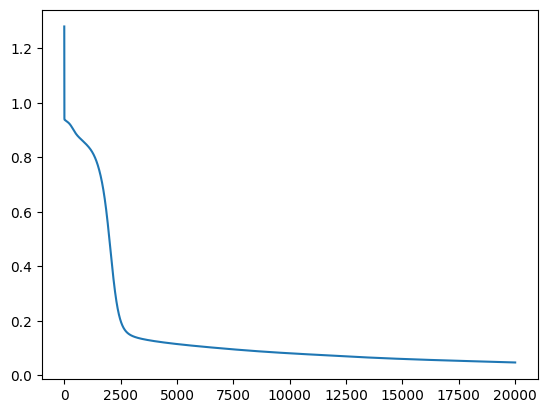

In [217]:
# ----------------
# Plotting the results with L2
plt.plot([loss.cpu().detach().numpy() for loss in loss_l])

### Plotting results

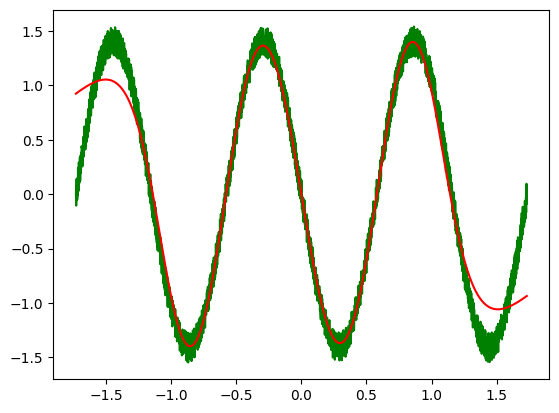

In [218]:
# ----------------
plt.plot(x_data.cpu().numpy(), y_data.cpu().numpy(), 'g')
plt.plot(x_data.cpu().numpy(), y_pred.cpu().detach().numpy(), 'r')

### Display the weights and the biases

Now, we want to check the effect of L1 regularization. For this you will plot the values of the weights of each layers.

Let us first initialize a new model.

In [219]:
neural_network_l1 = Net() # New model for L1

In order to use the $\text{L}1$ regularization, we add to the loss the following regularization term: $\lambda \sum_{w_{i}} | w_{i} |$, with $w_{i}$ being the model's weights.

In [220]:
# --- START CODE HERE (09)
MSELoss = torch.nn.MSELoss()
optimizer = optim.SGD(neural_network_l1.parameters(), lr = learning_rate_alpha, momentum=param_momentum)

loss_l1 = []

for epoch in range(nb_epoch):

    # --- START CODE HERE (10)
    
    optimizer.zero_grad()

    # Loss
    y_pred = neural_network_l1(x_data)
    loss = MSELoss(y_pred, target=y_data)

    # Regularization term
    regularization = param_L1_weight * sum(p.abs().sum() for p in neural_network_l1.parameters()) 
    
    # Adding loss
    loss += regularization
    loss.backward()
    optimizer.step()

    # --- END CODE HERE

    loss_l1.append(loss)
    if epoch % 1000 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.data))

# --- END CODE HERE

epoch 0, loss 1.0612410306930542
epoch 1000, loss 0.8720963001251221
epoch 2000, loss 0.8349482417106628
epoch 3000, loss 0.8035913705825806
epoch 4000, loss 0.7701045870780945
epoch 5000, loss 0.7393121123313904
epoch 6000, loss 0.7132487893104553
epoch 7000, loss 0.6715739965438843
epoch 8000, loss 0.6174309253692627
epoch 9000, loss 0.18071213364601135
epoch 10000, loss 0.10443642735481262
epoch 11000, loss 0.10298259556293488
epoch 12000, loss 0.10250068455934525
epoch 13000, loss 0.10213127732276917
epoch 14000, loss 0.10181932896375656
epoch 15000, loss 0.10152588784694672
epoch 16000, loss 0.10128302872180939
epoch 17000, loss 0.10110056400299072
epoch 18000, loss 0.10091931372880936
epoch 19000, loss 0.10075867921113968


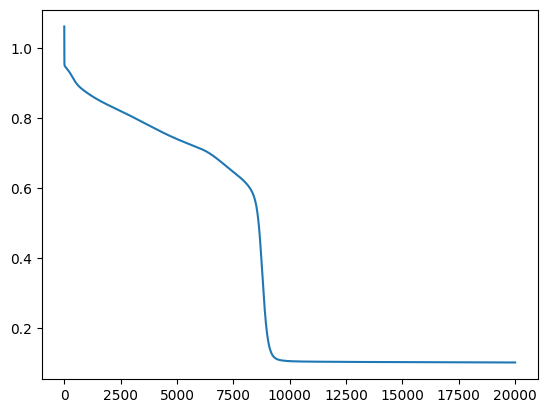

In [221]:
# ----------------
plt.plot([loss.cpu().detach().numpy() for loss in loss_l1]);

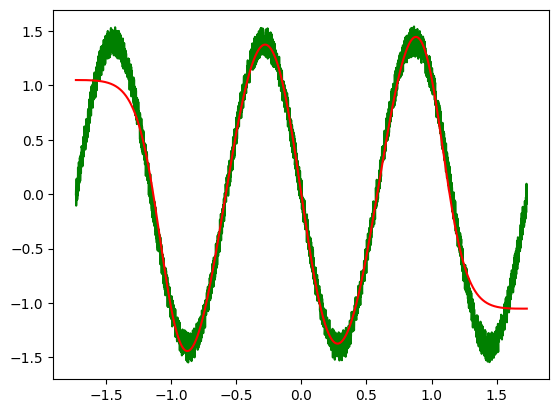

In [222]:
# ----------------
plt.plot(x_data.cpu().numpy(), y_data.cpu().numpy(), 'g')
plt.plot(x_data.cpu().numpy(), y_pred.cpu().detach().numpy(), 'r')

Let us compare the weights in the case of an $\text{L1}$ and $\text{L2}$ regularization, we start by plotting $\text{L1}$.

[[ 5.0623231e+00]
 [ 5.1510315e+00]
 [ 3.6175239e-05]
 [-2.8364677e+00]
 [-1.9780484e-06]
 [ 3.2541655e-05]
 [-2.7837470e+00]
 [ 3.8443257e-05]
 [ 3.5992177e+00]
 [ 1.2715691e-05]]
[ 5.4022927e+00 -5.5180664e+00 -2.9614474e-05 -1.6626676e+00
 -2.6624046e-05  4.0602852e-05  1.6329993e+00 -3.3375556e-05
 -5.4869310e-05 -4.6911049e-05]
[[-1.9473387e+00 -1.9496363e+00 -2.5805677e-05 -2.8537452e+00
   2.9658870e-05 -3.6702539e-05 -2.8703909e+00 -1.2611522e-05
  -2.8734381e+00  7.1763470e-06]]
[5.4334076e-05]


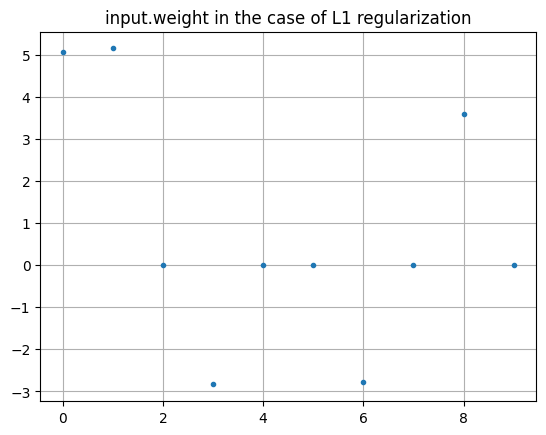

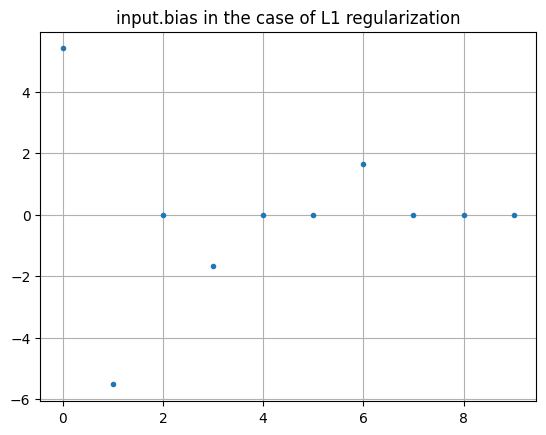

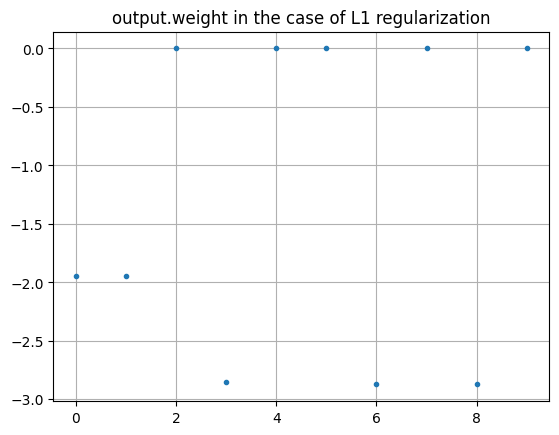

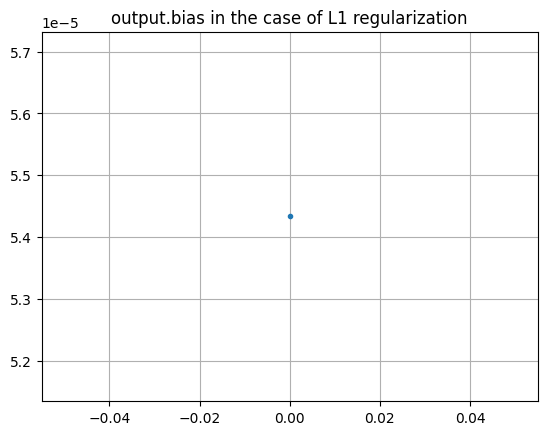

In [223]:
# L1 Regularization
list_l = [{'name':name, 'data':layer.data} for name, layer in neural_network_l1.named_parameters()]
for tmp in list_l:
    plt.figure()
    plt.plot(tmp['data'].flatten().cpu().numpy(), '.')
    plt.title(tmp['name'] + " in the case of L1 regularization")
    plt.grid(True)
    print(tmp['data'].cpu().numpy())

As we can see, some weights are put to zero or close to zero in the case of an $\text{L1}$ regularization. Moving on to $\text{L2}$:

[[-0.5816335]
 [ 3.1193128]
 [ 3.7225099]
 [-1.4040278]
 [ 3.1090684]
 [ 0.6449389]
 [-3.6860566]
 [-2.0098343]
 [ 3.0347185]
 [-1.684355 ]]
[-5.4517007e-01  1.8109162e+00  3.9404159e+00  1.0682322e-02
 -1.8124764e+00 -7.3115307e-01  3.9014962e+00  3.1999925e-03
 -1.1590054e-03  6.3539241e-03]
[[-2.2050397  3.0657291 -2.6143723  0.3532191  3.1124196  1.6563574
   2.6395655  1.1487383 -2.2498033  0.7216476]]
[-0.05460108]


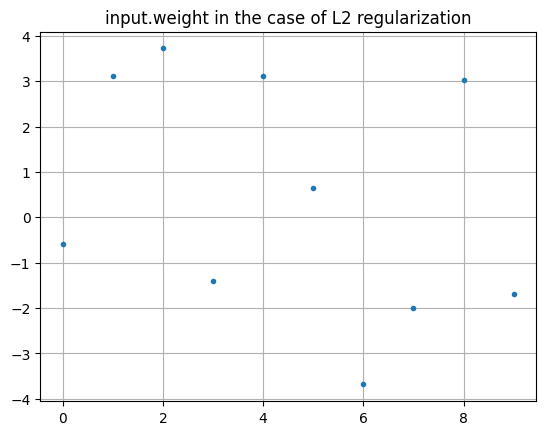

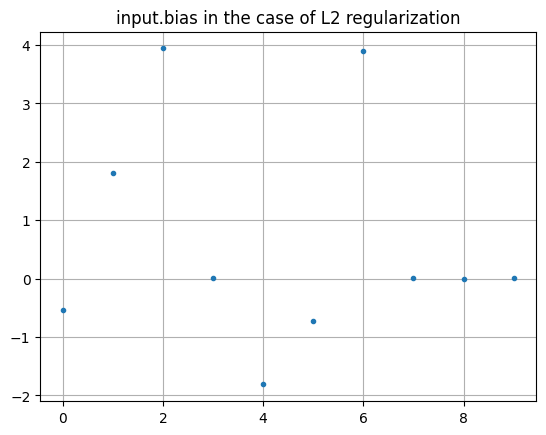

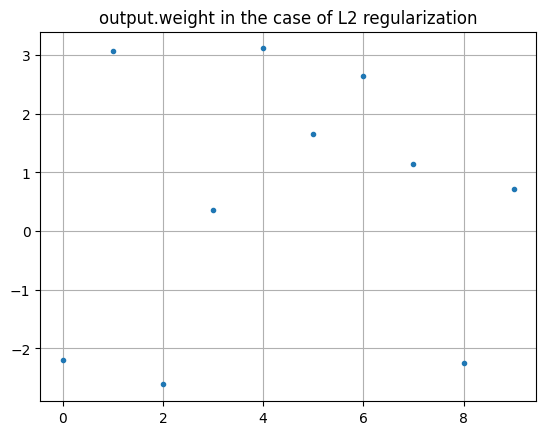

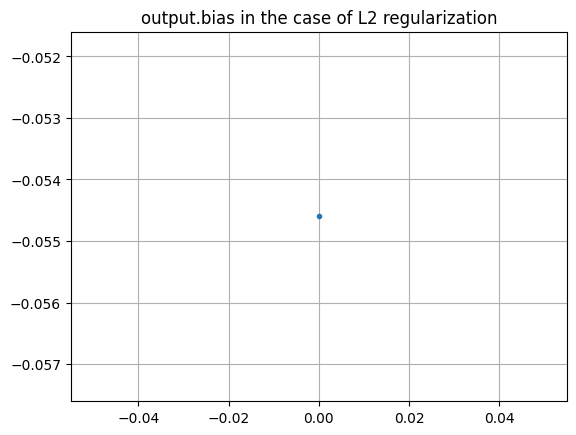

In [224]:
list_l = [{'name':name, 'data':layer.data} for name, layer in neural_network.named_parameters()]
for tmp in list_l:
    plt.figure()
    plt.plot(tmp['data'].flatten().cpu().numpy(), '.')
    plt.title(tmp['name'] + " in the case of L2 regularization")
    plt.grid(True)
    print(tmp['data'].cpu().numpy())

Unlike an $\text{L1}$ regularization, weights are not generally put to zero, the advantage of an $\text{L1}$ over an $\text{L2}$ is that we drop useless neuronnes and weights, this helps us avoid overfitting and helps regularize our model. 